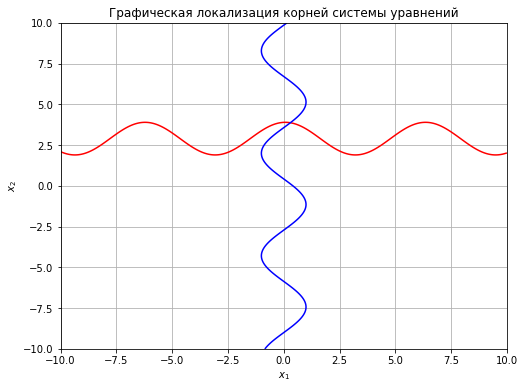

Корень 1: [0.2987123  3.87413939] найден за 7 итераций.
Корень 2: [0.29871251 3.87413954] найден за 5 итераций.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Определение функций системы и их Якобиана
def system_of_equations(variables):
    x1, x2 = variables
    return np.array([
        np.sin(x1 + 1.5) - x2 + 2.9,
        np.cos(x2 - 2) + x1
    ])

def jacobian(variables):
    x1, x2 = variables
    return np.array([
        [np.cos(x1 + 1.5), -1],
        [1, -np.sin(x2 - 2)]
    ])

# Визуализация системы уравнений
def visualize_system():
    x = np.linspace(-10, 10, 400)
    y = np.linspace(-10, 10, 400)
    X, Y = np.meshgrid(x, y)
    F1 = np.sin(X + 1.5) - Y + 2.9
    F2 = np.cos(Y - 2) + X
    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, F1, levels=[0], colors='r')
    plt.contour(X, Y, F2, levels=[0], colors='b')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title('Графическая локализация корней системы уравнений')
    plt.grid(True)
    plt.show()

visualize_system()

# Метод Ньютона для системы нелинейных уравнений
def newton_method(F, J, x0, eps=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        Fx = np.array(F(x))  # Преобразование списка в массив NumPy
        if np.linalg.norm(Fx, ord=np.inf) < eps:
            return x, i+1  # Возвращает найденное решение и количество итераций
        Jx = np.array(J(x))  # Аналогично преобразование для якобиана
        Dx = np.linalg.solve(Jx, -Fx)
        x = x + Dx
    return x, max_iter

# Начальные приближения, выбранные на основе визуализации
initial_guesses = [
    np.array([-1.5, 0]),  # Первое начальное приближение около точки пересечения
    np.array([1.5, -1])   # Второе начальное приближение около другой точки пересечения
]

# Применение метода Ньютона к системе уравнений
roots = []
iterations = []
for initial_guess in initial_guesses:
    root, iter_count = newton_method(system_of_equations, jacobian, initial_guess)
    roots.append(root)
    iterations.append(iter_count)

# Вывод найденных корней и количества итераций
for i, (root, iter_count) in enumerate(zip(roots, iterations)):
    print(f"Корень {i+1}: {root} найден за {iter_count} итераций.")